In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Загрузка данных 

In [37]:
loc='AnDan_2023/diabetes.csv'
df_diabetes = pd.read_csv(loc)
df_diabetes.shape
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Описание данных:
Ну что же, за тему своего проекта я взяла прогнозирование диагноза "Диабет" на основе данных о состоянии женщин из племени индейцев Пима. Целевая переменная, собственно, здесь "Outcome". Возможно, данный датасет будет дополняться по мере того, как я буду продвигаться по проекту и искать новую информацию, но пока это черновой вариант. Изначально я хотела парсить данные с сайтов магазинов секонд-хенда (так как анализ рынков секонд-хенда-тема моей научной работы), но также, как и в курсовой, я достаточно настрадалась от недостатка данных и решила сменить трекю Думаю, что данная тема гораздо интереснее, по крайней мере для меня. 

Приступим теперь собственно к анализу данных:
В колонке **"Pregnancies"** находится информация о количестве беременностей у женщин\
В колонке **"Glucose"** - Концентрация глюкозы в плазме через 2 часа после перорального теста на толерантность к глюкозе\
В колонке **"BloodPressure"**-треки артериального давления (мм рт. ст.)\
**"SkinThickness"**-толщина кожной складки на трицепсе (мм)\
В колонке **"Insulin"**- двухчасовой уровень сывороточного инсулина (ме Ед / мл)\
**"BMI"**-Body Mass Index (индекс массы тела)(вес в кг / (рост в м) ^ 2))\
**"DiabetesPedigreeFunction"**-функция родословной диабета\
**"Age"**-возраст пациентов\
**"Outcome"**-целевая переменная, при этом '0'-человек не болен диабетом, '1'-человек болен диабетом\

In [38]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [39]:
df_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [40]:
df_diabetes.isnull().sum() #Хороший датасет, без пропусков

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [41]:
#Уровень глюкозы, также как и давление не может быть равным нулю, поэтому заменим их средними
df_diabetes['Glucose'] = df_diabetes['Glucose'].replace(0, df_diabetes['Glucose'].mean())

In [42]:
df_diabetes['BloodPressure'] = df_diabetes['BloodPressure'].replace(0, df_diabetes['BloodPressure'].mean())

In [43]:
df_diabetes['BMI'] = df_diabetes['BMI'].replace(0, df_diabetes['BMI'].median())
df_diabetes['SkinThickness'] = df_diabetes['SkinThickness'].replace(0, df_diabetes['SkinThickness'].median())
df_diabetes['Insulin'] = df_diabetes['Insulin'].replace(0, df_diabetes['Insulin'].median())

In [44]:
numeric_vars = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

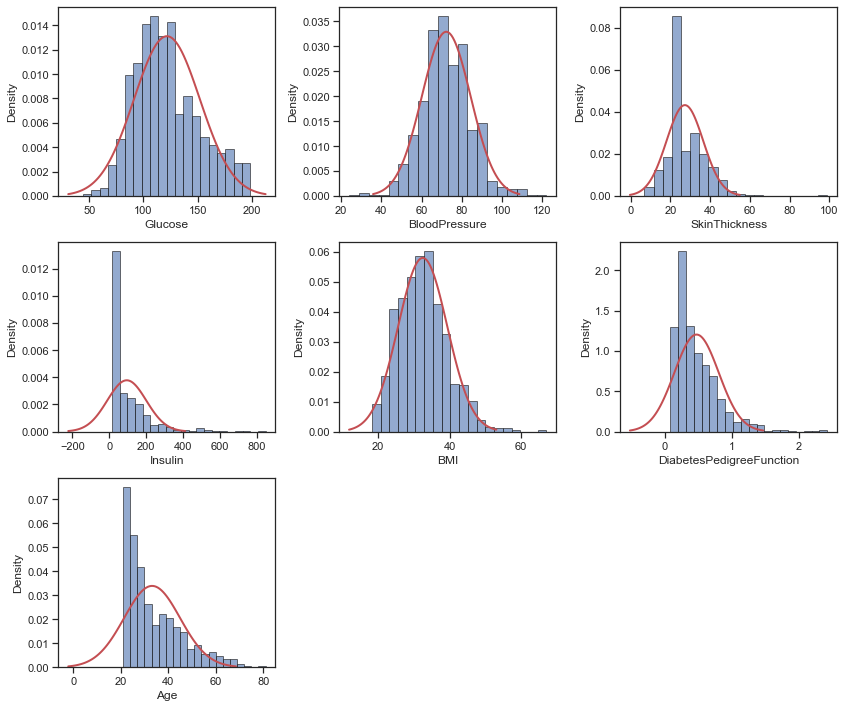

In [45]:
from scipy.stats import norm
plt.figure(figsize=(12, 10))
for i, var in enumerate(numeric_vars):
    plt.subplot(3, 3, i+1)
    plt.hist(df_diabetes[var], bins=20, density=True, alpha=0.6, edgecolor='k')

    # Add normal distribution plot
    mu, sigma = df_diabetes[var].mean(), df_diabetes[var].std()
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    plt.plot(x, norm.pdf(x, mu, sigma), 'r-', lw=2)

    plt.xlabel(var)
    plt.ylabel('Density')
plt.tight_layout()
plt.show()

In [46]:
#Выше представлены гистограммы распределения численных переменных датасета
#Визуально, только индекс BMI похож на нормальное распределение в сравнении с остальными признаками. В колонке Age преобладают 
#денщины более молодого возраста. 

In [47]:
target_var = 'Outcome'

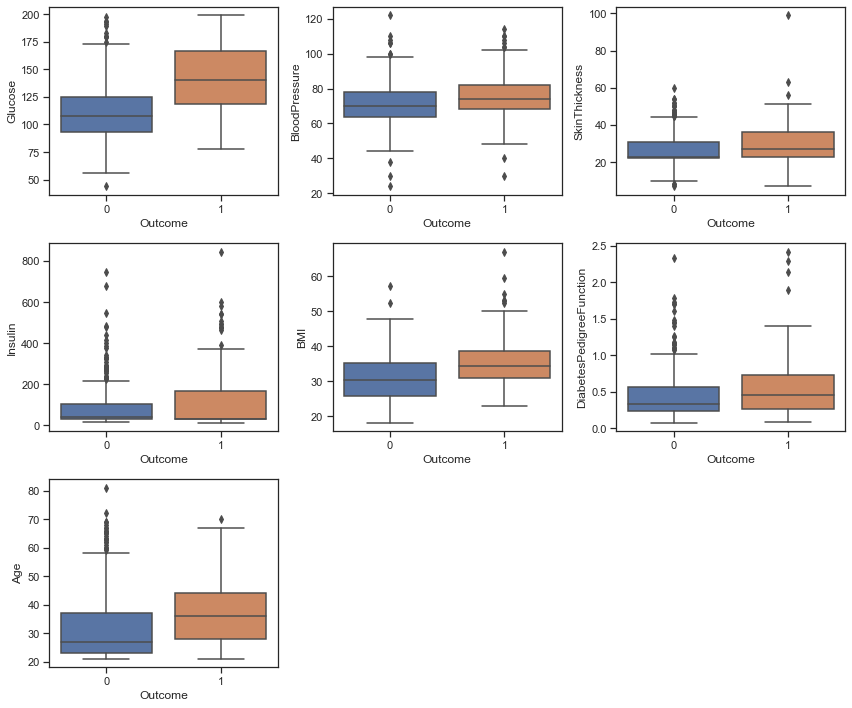

In [48]:
import seaborn as sns
plt.figure(figsize=(12, 10))
for i, var in enumerate(numeric_vars):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df_diabetes[target_var], y=df_diabetes[var])
    plt.xlabel('Outcome')
    plt.ylabel(var)
plt.tight_layout()
plt.show()

In [49]:
#судя по графикам, чем выше уровень глюкозы в крови, тем выше вероятность того, что ауткам будет положительный, также и с BMI
#исходя из этих закономерностей, можно сделать вывод о том, что чем больше вес и уровень глюкозы, тем выше вероятность диабета

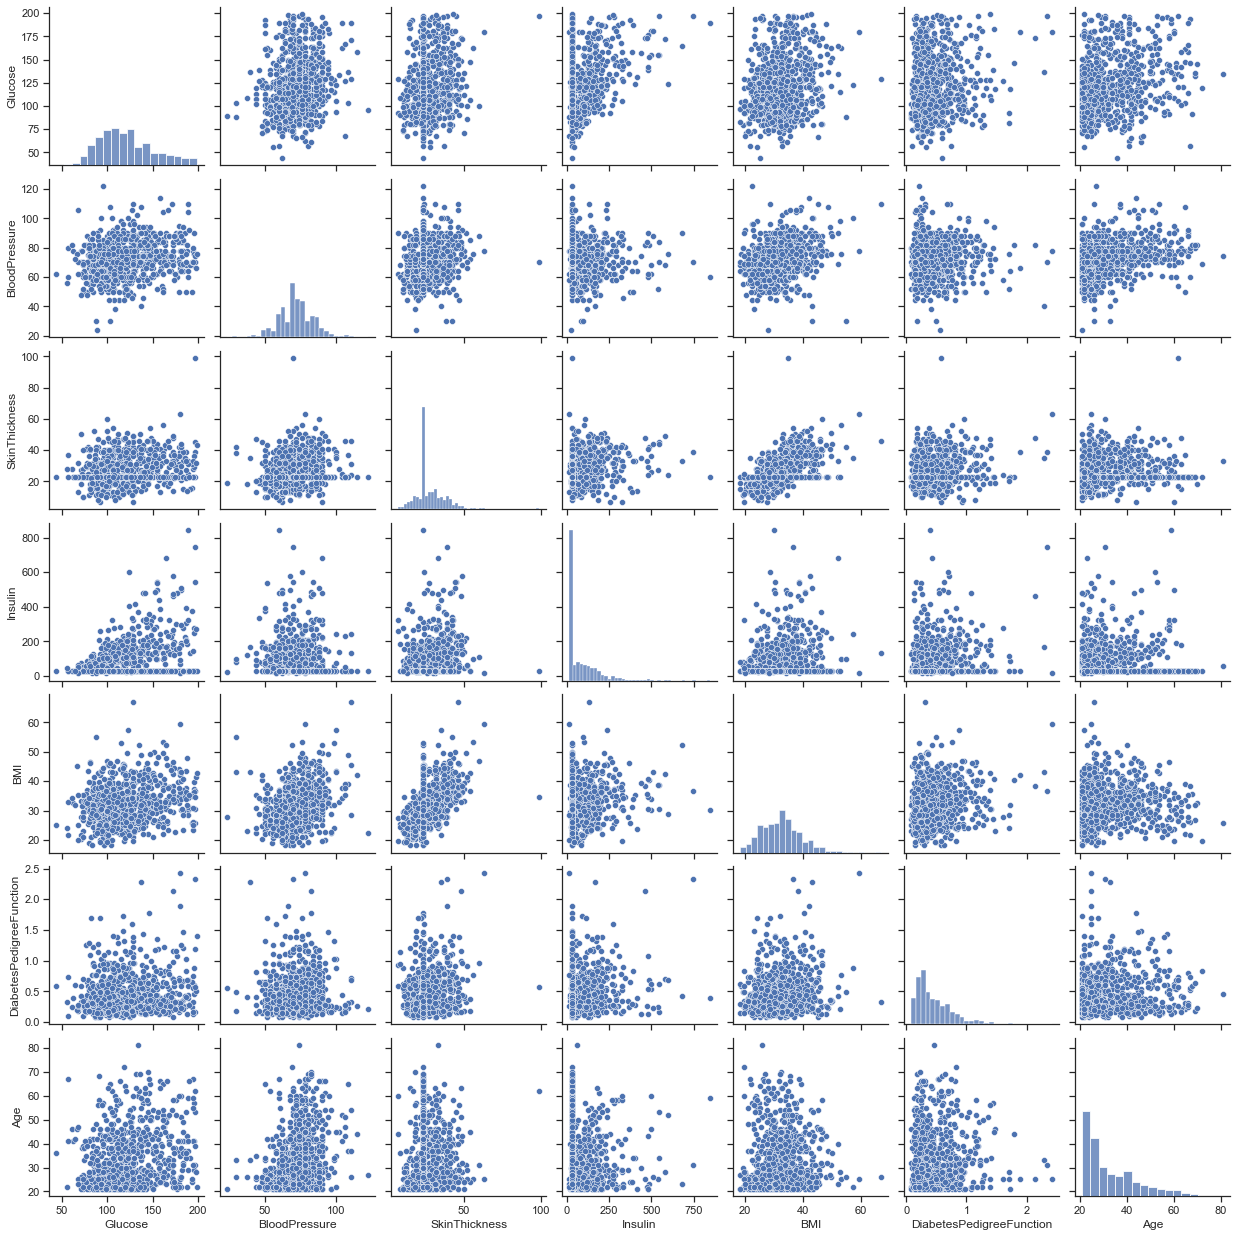

In [50]:
sns.set(style='ticks')
sns.pairplot(df_diabetes[numeric_vars])
plt.show()

In [51]:
#По графикам видно, что прямую линию, которая свидетельствовала бы о имебщейся взаимосвязи прослеживается между переменными, 
#характеризующими вес и толщину кожного покрова, а также между инсулином и уровнем глюкозы

In [52]:
#Основная цель, понять, что может привести к заболеванию диабетом, одной из моих гипотез будет то, что на это влияет 
#наследственный фактор, поэтому взглянем на график зависимости переменной DiabetesPedigreeFunction от Insulin:

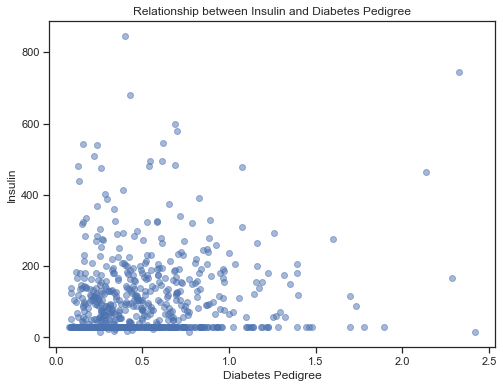

In [53]:
plt.figure(figsize=(8, 6))
plt.scatter(df_diabetes['DiabetesPedigreeFunction'], df_diabetes['Insulin'], alpha=0.5)
plt.xlabel('Diabetes Pedigree')
plt.ylabel('Insulin')
plt.title('Relationship between Insulin and Diabetes Pedigree')
plt.show()

In [54]:
#По графику видно, что есть некая взаимосвязь между уровнем инсулина в крови и склонностью к диабету
#(Для справки:Диабет – это хроническое заболевание, которое возникает либо в случаях, когда поджелудочная 
#железа не вырабатывает достаточное количество инсулина, либо когда организм не может эффективно использовать 
#вырабатываемый инсулин. Инсулин – это гормон, регулирующий уровень глюкозы в крови)

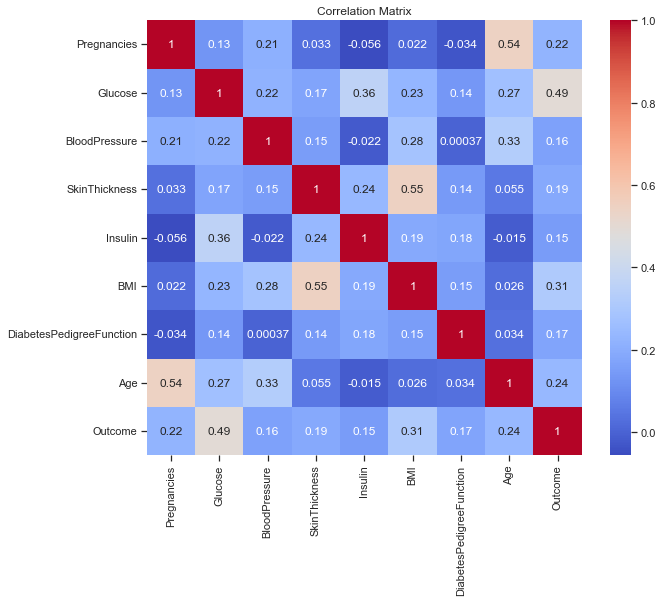

In [55]:
import seaborn as sns
corr_matrix=df_diabetes.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

In [56]:
#Сырая модель без подбора гиперпараметров:
from sklearn.model_selection import train_test_split
X= df_diabetes.drop(["Outcome"], axis=1)
y = df_diabetes["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
model=LogisticRegression(random_state=42)

In [59]:
import warnings
warnings.filterwarnings("ignore")
model.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [60]:
y_pred_proba=model.predict_proba(X_test)[:,1]

In [61]:
from sklearn.metrics import roc_auc_score, accuracy_score,precision_score,recall_score,confusion_matrix

In [62]:
threshold=0.5

In [63]:
y_pred_binary=(y_pred_proba>=threshold).astype(int)

In [64]:
roc_auc=roc_auc_score(y_test,y_pred_proba)
accuracy=accuracy_score(y_test,y_pred_binary)
precision=precision_score(y_test,y_pred_binary)
recall=recall_score(y_test,y_pred_binary)
confusion=confusion_matrix(y_test, y_pred_binary)

In [65]:
print(f'ROC AUC : {roc_auc: .3f}')
print(f'Accuracy : {accuracy: .3f}')
print(f'Precision : {precision: .3f}')
print(f'Recall : {recall: .3f}')
print('Confusion matrix:')
print(confusion)

ROC AUC :  0.831
Accuracy :  0.773
Precision :  0.692
Recall :  0.655
Confusion matrix:
[[83 16]
 [19 36]]


In [66]:
#Видно, что уже на данном этапе хорошая точность, но я еще планирую использовать кросс-валидацию и другие модели, 
#а потом их сравнивать

In [67]:
#Я не знаю, каким лучше способом тестить гипотезы, но скорее  всего это будет АБ тест

Ссылка на гугл-диск:https://drive.google.com/open?id=1-uMfTDjvP9xxq3FeluPv6kXN-dC4w0u5&authuser=tamaraskripkina.s%40gmail.com&usp=drive_fs